In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# A. ESTATÍSTICA DESCRITIVA E EXPLORAÇÃO INICIAL

# 1. Carregar dataset
df = pd.read_csv("boardgame-geek-dataset_organized.csv")

# Criando playing_time = média (opção B escolhida)
df["playing_time"] = (df["min_playtime"] + df["max_playtime"]) / 2

# 2. Mostrar primeiras linhas
print("5 primeiras linhas:\n")
print(df.head())

# 3. Info()
print("\nInformações do DataFrame:\n")
print(df.info())

# 4. Describe()
print("\nEstatísticas descritivas:\n")
print(df[["avg_rating", "playing_time"]].describe())

# 5. Respostas:
# Nota média do dataset
media_nota = df["avg_rating"].mean()
print(f"\nNota média (avg_rating): {media_nota:.3f}")

# Tempo médio e desvio padrão
media_tempo = df["playing_time"].mean()
desvio_tempo = df["playing_time"].std()
print(f"Tempo médio: {media_tempo:.2f} minutos")
print(f"Desvio padrão: {desvio_tempo:.2f} minutos")

# Colunas com nulos
print("\nColunas com valores nulos:\n")
print(df.isnull().sum()[df.isnull().sum() > 0])


5 primeiras linhas:

   row_id                          boardgame  release_year  min_players  \
0       1                  Brass: Birmingham          2018            2   
1       2          Pandemic Legacy: Season 1          2015            2   
2       3                           Ark Nova          2021            1   
3       4                         Gloomhaven          2017            1   
4       5  Twilight Imperium: Fourth Edition          2017            3   

   max_players  min_playtime  max_playtime  minimum_age  avg_rating  \
0            4            60           120           14       8.575   
1            4            60            60           13       8.512   
2            4            90           150           14       8.539   
3            4            60           120           14       8.557   
4            6           240           480           14       8.572   

   num_ratings  ...  rank_thematic  rank_family  rank_war  rank_customizable  \
0        53548  ...  


Valores nulos em avg_rating: 0


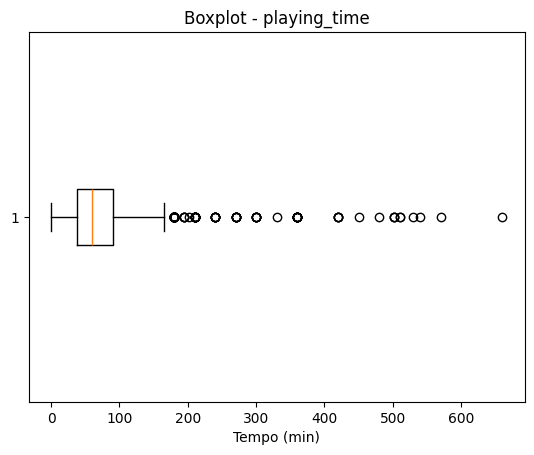


Número de outliers de playing_time: 119


In [8]:
# B. TRATAMENTO DE AUSENTES E OUTLIERS

# 1. Valores nulos em avg_rating
nulos_rating = df["avg_rating"].isnull().sum()
print(f"\nValores nulos em avg_rating: {nulos_rating}")

# 2. Preencher com mediana (se existir)
if nulos_rating > 0:
    mediana_rating = df["avg_rating"].median()
    df["avg_rating"].fillna(mediana_rating, inplace=True)
    # Justificativa:
    # A mediana é melhor que a média porque não sofre tanto com outliers.
    print("Valores nulos preenchidos com a mediana.")

# 3. Boxplot para playing_time
plt.boxplot(df["playing_time"], vert=False)
plt.title("Boxplot - playing_time")
plt.xlabel("Tempo (min)")
plt.show()

# 4. Calcular IQR e outliers
q1 = df["playing_time"].quantile(0.25)
q3 = df["playing_time"].quantile(0.75)
iqr = q3 - q1

lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

outliers = df[(df["playing_time"] < lim_inf) | (df["playing_time"] > lim_sup)]
print(f"\nNúmero de outliers de playing_time: {len(outliers)}")


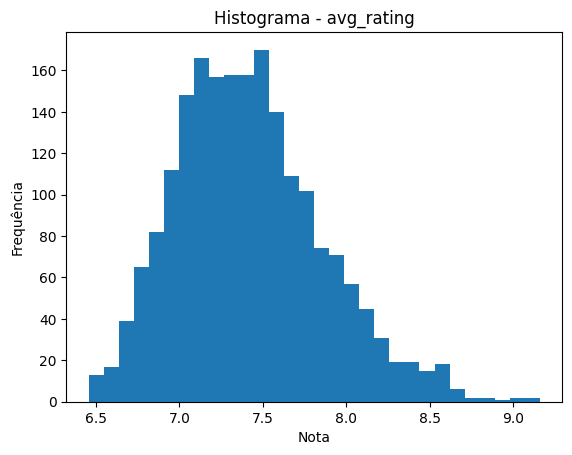


Assimetria (skewness) de avg_rating: 0.567
Distribuição assimétrica positiva.


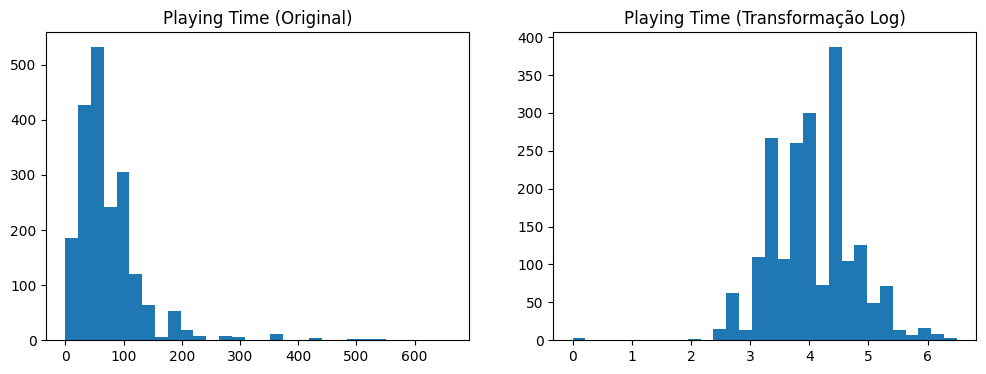

In [9]:
# C. VISUALIZAÇÃO E TRANSFORMAÇÃO DE DADOS

# 1. Histograma de average_rating
plt.hist(df["avg_rating"], bins=30)
plt.title("Histograma - avg_rating")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.show()

# 2. Assimetria
skew = df["avg_rating"].skew()
print(f"\nAssimetria (skewness) de avg_rating: {skew:.3f}")

if skew > 0:
    print("Distribuição assimétrica positiva.")
elif skew < 0:
    print("Distribuição assimétrica negativa.")
else:
    print("Distribuição aproximadamente simétrica.")

# 3. Transformação log
df["playing_time_log"] = np.log1p(df["playing_time"])

# 4. Histogramas comparativos
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(df["playing_time"], bins=30)
plt.title("Playing Time (Original)")

plt.subplot(1,2,2)
plt.hist(df["playing_time_log"], bins=30)
plt.title("Playing Time (Transformação Log)")

plt.show()

# Comentário:
# A transformação log reduz a assimetria e distribui melhor valores muito altos.


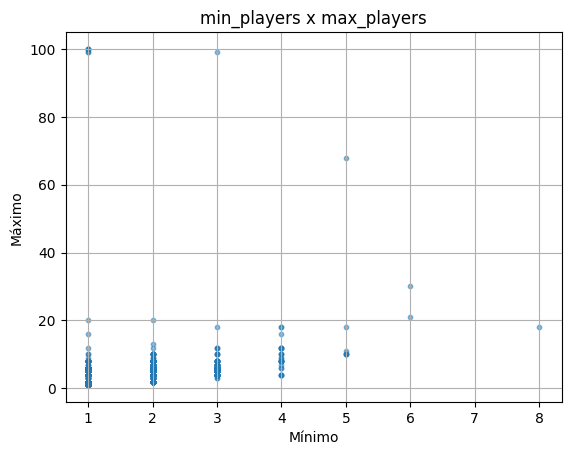


Correlação min_players x max_players: 0.099


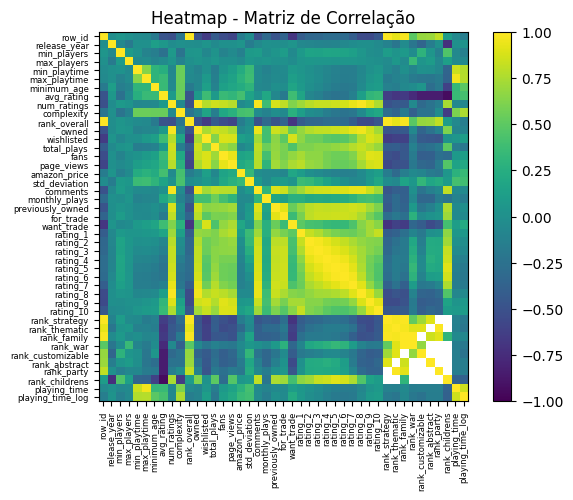


Maior correlação positiva: ('row_id', 'rank_overall') = 1.000
Correlação mais próxima de zero: ('total_plays', 'std_deviation') = 0.000


In [10]:
# D. ANÁLISE DA RELAÇÃO ENTRE VARIÁVEIS

# 1. Scatter plot: min_players x max_players
plt.scatter(df["min_players"], df["max_players"], s=10, alpha=0.5)
plt.title("min_players x max_players")
plt.xlabel("Mínimo")
plt.ylabel("Máximo")
plt.grid(True)
plt.show()

# 2. Correlação
corr_min_max = df["min_players"].corr(df["max_players"])
print(f"\nCorrelação min_players x max_players: {corr_min_max:.3f}")

# 3. Matriz de correlação
corr = df.corr(numeric_only=True)

# 4. Heatmap simples
plt.imshow(corr, vmin=-1, vmax=1)
plt.colorbar()
plt.title("Heatmap - Matriz de Correlação")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, fontsize=6)
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=6)
plt.show()

# 5. Pares mais fortes e mais fracos
corr_pairs = corr.unstack().dropna()
corr_pairs = corr_pairs[corr_pairs != 1]  # remover correlação consigo mesmo

maior_corr = corr_pairs.idxmax()
valor_maior_corr = corr_pairs.max()

menor_corr = corr_pairs.abs().idxmin()
valor_menor_corr = corr_pairs.loc[menor_corr]

print(f"\nMaior correlação positiva: {maior_corr} = {valor_maior_corr:.3f}")
print(f"Correlação mais próxima de zero: {menor_corr} = {valor_menor_corr:.3f}")


In [11]:
# E. ANÁLISE TEMPORAL

# 1. Coluna de ano = release_year

# 2. Criar coluna década
df["Decada"] = (df["release_year"] // 10) * 10

# 3. Contagem por década
decadas = df["Decada"].value_counts().sort_index()
print("\nLançamentos por década:")
print(decadas)

# 4. Década com mais lançamentos
decada_top = decadas.idxmax()
qtd_top = decadas.max()
print(f"\nDécada com mais lançamentos: {decada_top}s com {qtd_top} jogos")



Lançamentos por década:
Decada
0          3
1470       1
1580       1
1630       1
1800       1
1810       1
1850       1
1870       1
1920       1
1950       1
1960       2
1970       9
1980      25
1990      74
2000     280
2010    1031
2020     567
Name: count, dtype: int64

Década com mais lançamentos: 2010s com 1031 jogos
